In [2]:


from scouter_agent.domain.tile_geometry import TileGeometryCalibrator

In [3]:
import cv2

In [4]:
image_path = """C:\\Users\\JM\Documents\\JM-codeworld\\LSS_automation\\scouter_agent\\temp\\screen_10_10.png"""
skeleton_image_path = "C:\\Users\\JM\Documents\\JM-codeworld\\LSS_automation\\scouter_agent\\temp\\skeleton_image.png"
image = cv2.imread(image_path)


Slope Clusters Found: 2
  Intercept Clusters in Slope Group 0: 9
  Intercept Clusters in Slope Group 1: 9


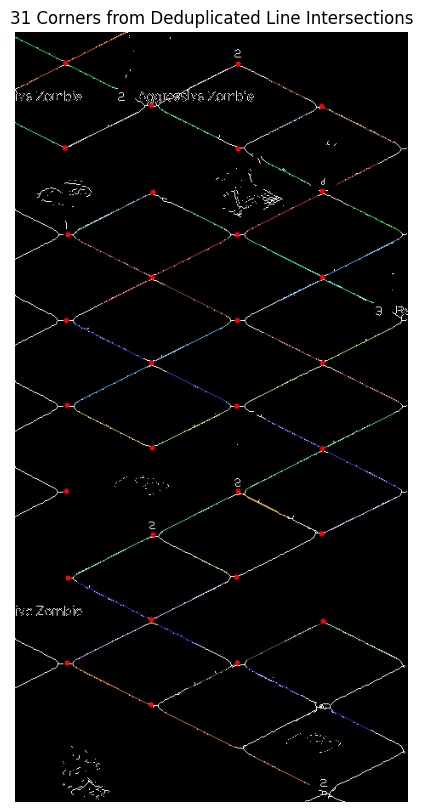

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


EasyOCR raw output: ['X 592', 'Y: 642']


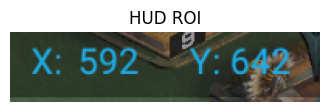

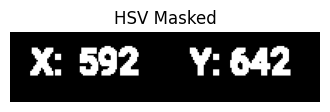

In [8]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from scouter_agent.infrastructure.ocr_utils import _hsv_mask, ocr_reader, coord_regex

img_path = Path("C:\\Users\\JM\Documents\\JM-codeworld\\LSS_automation\\scouter_agent\\temp\\screen_0_0.png")        # change to a real file
crop = (275, 1025, 475, 1070)                  # your HUD ROI

img = cv2.imread(str(img_path))
x1, y1, x2, y2 = crop
roi = img[y1:y2, x1:x2]

# 1) Show raw ROI
plt.figure(figsize=(4,2)); plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)); plt.title("HUD ROI"); plt.axis("off")

# 2) Show HSV‑masked ROI
mask_gray = _hsv_mask(roi)
plt.figure(figsize=(4,2)); plt.imshow(mask_gray, cmap="gray"); plt.title("HSV Masked"); plt.axis("off")

# 3) Print OCR raw text
texts = ocr_reader.readtext(mask_gray, detail=0, paragraph=False)
print("EasyOCR raw output:", texts)

# 4) Apply regex manually
for t in texts:
    m = coord_regex.search(t)
    if m:
        print("Matched:", m.groups())
